# Exploratory Data Analysis (method 2)
- https://towardsdatascience.com/13-key-code-blocks-for-eda-classification-task-94890622be57

In [2]:
# import all libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
# sneak peak into the data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# We can drop the id column since it has no impact on the outcome (stroke)
del data['id']

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
# Dimensions of the dataset
data.shape

(5110, 11)

We have 5110 entries of patients with 11 attributes, 10 being independant variables and 1 (stroke) being the dependant or target variable

In [12]:
# Data types of various columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Object data types are catagorical, whereas the rest are numerical. This helps us identify what plots to use while visualizing this data

## Numeric Features
Numeric (continuous) features, the values are grouped in ranges, also known as bins

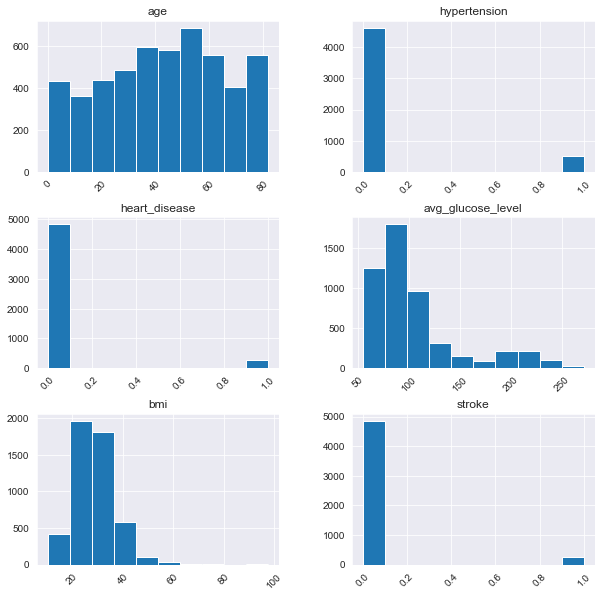

In [18]:
data.hist(figsize=(10,10),xrot=45)
plt.show()

- Age is represented quite evenly, though most data lies between ages 20-60
- Hypertension has a huge data imbalance with most values being 0
- Heart Disease has a huge data imbalance with most values being 1
- Stroke is the target variable. It has imbalance since most values are negative or 0 

In [20]:
# Numeric features summary statistics
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- bmi has some missing or NAN values since its count is lower than the number of entries
- thre seems to be some outliers in the bmi data
- Otherwise the data seems consistant, the mean and median (50th percentile) values are close enough and there arent any outliers

## Categorical features
Categorical features are columns that contain only a handful of unique values, and therefore each value belongs to a particular class or group.

In [22]:
# Categorica features summary statistics
data.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


- There seems to be no NAN or missing values